


<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>

*   List item
*   List item


<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import plotly.graph_objs as go
from chart_studio import plotly
import plotly.offline as offline
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
#!unzip training_text.zip

In [5]:
#!unzip training_variants.zip

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [6]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [7]:
# note the seprator in this file
# skiprows=1, won't read the line 1, which is 'ID||TEXT'
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/prasun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [10]:
time.clock = time.time

In [11]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    
    #print(row)
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 62.7324161529541 seconds


In [12]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [13]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [14]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [15]:
result[result.isnull().any(axis=1)]  # ensures no missing value

,ID,Gene,Variation,Class,TEXT


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [16]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [17]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

In [18]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
train_class_distribution

1    363
2    289
3     57
4    439
5    155
6    176
7    609
8     12
9     24
Name: Class, dtype: int64

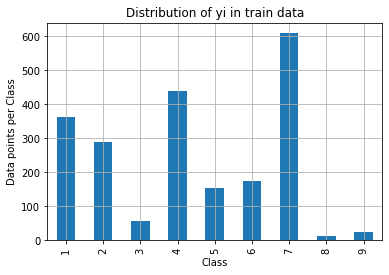

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


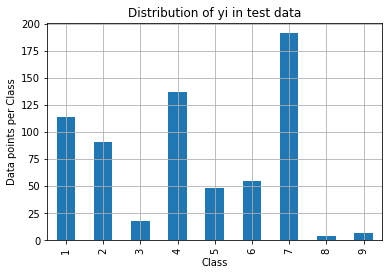

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


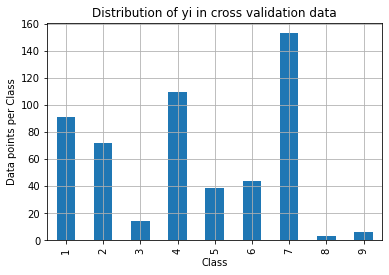

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [19]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4758534863030834
Log loss on Test Data using Random Model 2.4809848532484584
-------------------- Confusion matrix --------------------


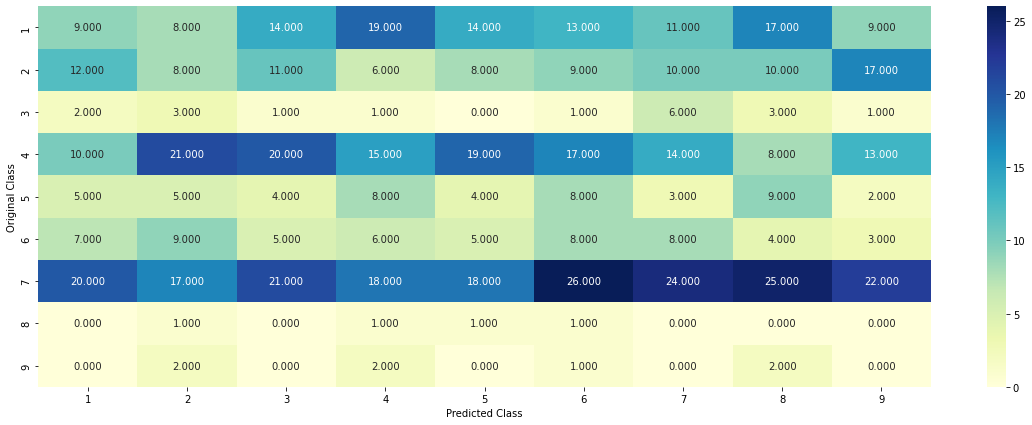

-------------------- Precision matrix (Columm Sum=1) --------------------


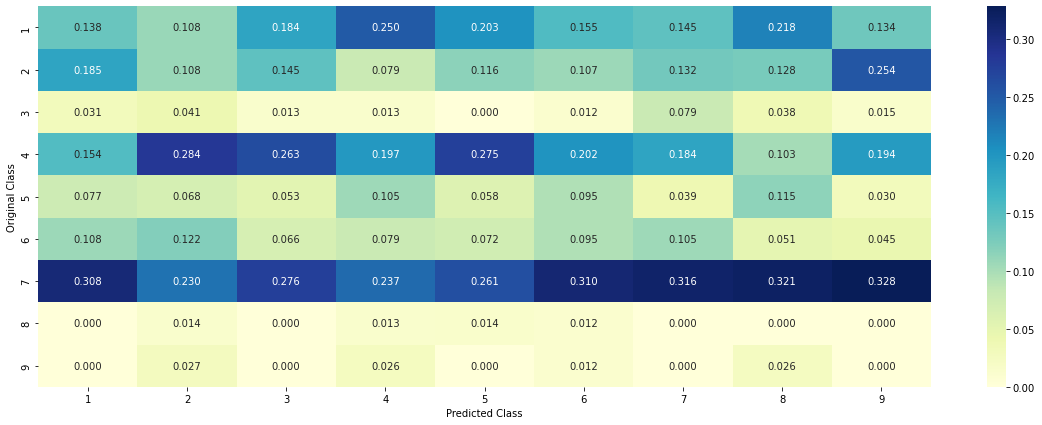

-------------------- Recall matrix (Row sum=1) --------------------


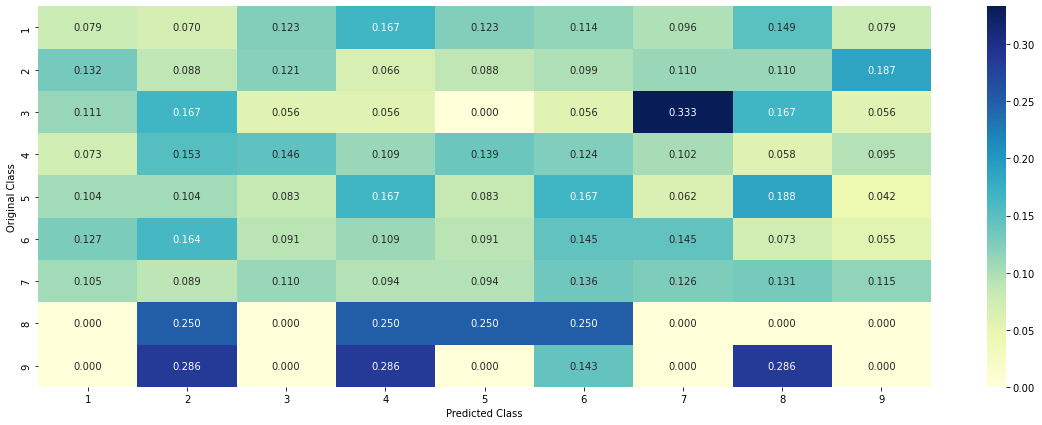

In [21]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

#print(test_predicted_y[0])
predicted_y =np.argmax(test_predicted_y, axis=1)
#print(predicted_y)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [22]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [23]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 233
BRCA1     167
TP53      109
BRCA2      89
EGFR       86
PTEN       77
KIT        67
BRAF       63
ERBB2      46
ALK        45
PDGFRA     41
Name: Gene, dtype: int64


In [24]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 233 different categories of genes in the train data, and they are distibuted as follows


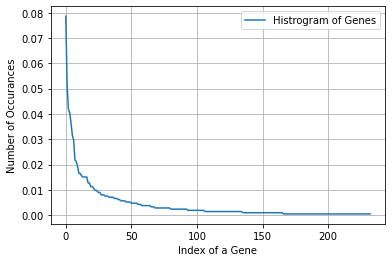

In [25]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


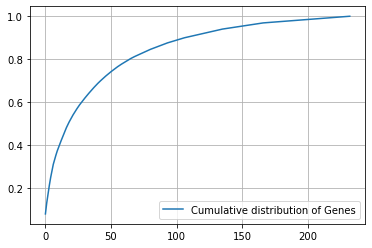

In [26]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [27]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [28]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:   ", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:    (2124, 9)


In [29]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [30]:
gene_vectorizer.get_feature_names()[0:10]  # print 10 features

['abl1', 'acvr1', 'ago2', 'akt1', 'akt2', 'akt3', 'alk', 'apc', 'ar', 'araf']

In [31]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:    ", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:     (2124, 232)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

best hyperparameter:  {'alpha': 0.0001}


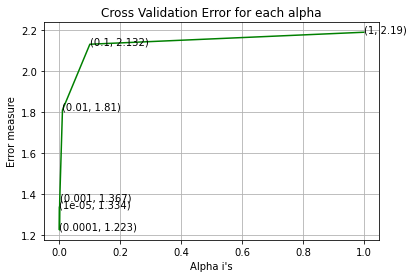

For values of best alpha =  0.0001 The train log loss is: 1.0005450836407925
For values of best alpha =  0.0001 The cross validation log loss is: 1.1844411589626096
For values of best alpha =  0.0001 The test log loss is: 1.175091232686389


In [32]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]

alpha = {'alpha':[10 ** x for x in range(-5, 1)]} # hyperparam for SGD classifier.
clf = SGDClassifier(penalty='l2', loss='log')
clf = GridSearchCV(clf, alpha, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
predict_y = clf.predict_proba(cv_gene_feature_onehotCoding)
cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))
#cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
print("best hyperparameter: ",clf.best_params_)
gene_best_hyperparameter = clf.best_params_['alpha']
#print(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha['alpha'], cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha['alpha'][i],np.round(txt,3)), (alpha['alpha'][i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=clf.best_params_['alpha'], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', gene_best_hyperparameter, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', gene_best_hyperparameter, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', gene_best_hyperparameter, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [33]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  233  genes in train dataset?
Ans
1. In test data 646 out of 665 : 97.14285714285714
2. In cross validation data 515 out of  532 : 96.80451127819549


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [34]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1928
Truncating_Mutations    63
Amplification           46
Deletion                46
Fusions                 25
G12V                     4
S222D                    2
G67R                     2
V321M                    2
A146V                    2
G12A                     2
Name: Variation, dtype: int64


In [35]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1928 different categories of variations in the train data, and they are distibuted as follows


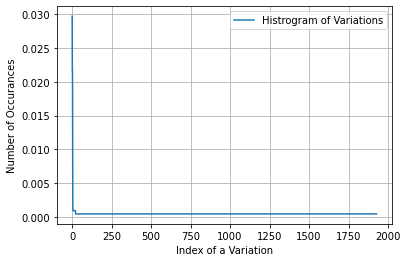

In [36]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02966102 0.05131827 0.07297552 ... 0.99905838 0.99952919 1.        ]


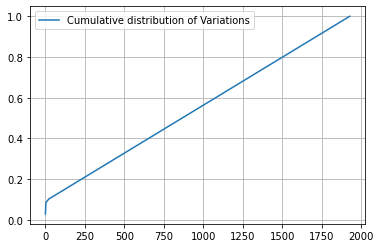

In [37]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [38]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [39]:
train_variation_feature_responseCoding[0]

array([0.12087912, 0.10989011, 0.10989011, 0.10989011, 0.10989011,
       0.10989011, 0.10989011, 0.10989011, 0.10989011])

In [40]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [41]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [42]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1961)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

best hyperparameter:  {'alpha': 0.0001}


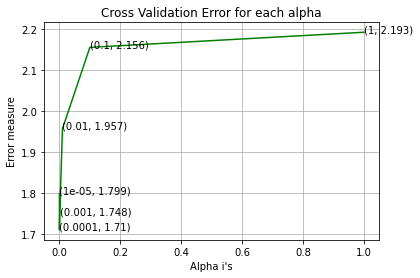

For values of best alpha =  0.0001 The train log loss is: 0.6784608460615817
For values of best alpha =  0.0001 The cross validation log loss is: 1.7104363292482556
For values of best alpha =  0.0001 The test log loss is: 1.717438837662225


In [43]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]

alpha = {'alpha':[10 ** x for x in range(-5, 1)]} # hyperparam for SGD classifier.
clf = SGDClassifier(penalty='l2', loss='log')
clf = GridSearchCV(clf, alpha, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
predict_y = clf.predict_proba(cv_variation_feature_onehotCoding)
cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))
#cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
print("best hyperparameter: ",clf.best_params_)
variation_best_hyperparameter = clf.best_params_['alpha']
#print(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha['alpha'], cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha['alpha'][i],np.round(txt,3)), (alpha['alpha'][i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=clf.best_params_['alpha'], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', variation_best_hyperparameter, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', variation_best_hyperparameter, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', variation_best_hyperparameter, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [44]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " variation in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1928  variation in test and cross validation data sets?
Ans
1. In test data 72 out of 665 : 10.827067669172932
2. In cross validation data 50 out of  532 : 9.398496240601503


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [45]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
        #print(dictionary)
    
    return dictionary

In [46]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [47]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52011


In [48]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    
    #print(cls_text)
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    
    #print(dict_list)
    
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)
#print(total_dict)

confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [49]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [50]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [51]:
train_text_feature_responseCoding[0].sum()

1.0

In [52]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [53]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

best hyperparameter:  {'alpha': 0.001}


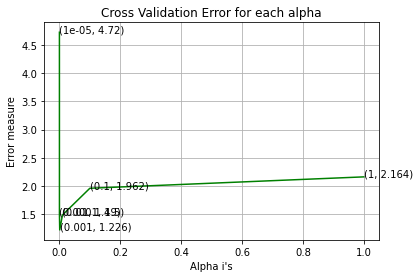

For values of best alpha =  0.001 The train log loss is: 0.6574403746003629
For values of best alpha =  0.001 The cross validation log loss is: 1.1991081028154542
For values of best alpha =  0.001 The test log loss is: 1.128241428598886


In [54]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]

alpha = {'alpha':[10 ** x for x in range(-5, 1)]} # hyperparam for SGD classifier.
clf = SGDClassifier(penalty='l2', loss='log')
clf = GridSearchCV(clf, alpha, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
predict_y = clf.predict_proba(cv_text_feature_onehotCoding)
cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))
#cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
print("best hyperparameter: ",clf.best_params_)
text_best_hyperparameter = clf.best_params_['alpha']
#print(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha['alpha'], cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha['alpha'][i],np.round(txt,3)), (alpha['alpha'][i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


#best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=clf.best_params_['alpha'], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', text_best_hyperparameter, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', text_best_hyperparameter, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', text_best_hyperparameter, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [55]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [56]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

94.723 % of word of test data appeared in train data
97.044 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [57]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [58]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [59]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_vec.get_feature_names())
    
    #print(fea1_len)
    #print(fea2_len)
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            #print(i, word, "1st")
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            #print(i, word, "2nd")
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Left"> <b>Stacking the three types of features </b><p>

In [60]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [61]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54204)
(number of data points * number of features) in test data =  (665, 54204)
(number of data points * number of features) in cross validation data = (532, 54204)


In [62]:

train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [63]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

best hyperparameter:  {'alpha': 1}


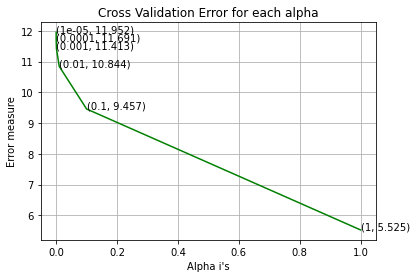

For values of best alpha =  1 The train log loss is: 0.8987572272247077
For values of best alpha =  1 The cross validation log loss is: 1.27542443011378
For values of best alpha =  1 The test log loss is: 1.2488488749675963


In [167]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


cv_log_error_array=[]

alpha = {'alpha':[10 ** x for x in range(-5, 1)]} # hyperparam for SGD classifier.
clf = MultinomialNB()
clf = GridSearchCV(clf, alpha, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_x_onehotCoding, y_train)
cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))
print("best hyperparameter: ",clf.best_params_)
nb_best_hyperparameter = clf.best_params_['alpha']
#print(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha['alpha'], cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha['alpha'][i],np.round(txt,3)), (alpha['alpha'][i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


#best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=clf.best_params_['alpha'])
clf.fit(train_x_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', nb_best_hyperparameter, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', nb_best_hyperparameter, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', nb_best_hyperparameter, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
nb_logloss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.27542443011378
Number of missclassified point : 0.38721804511278196
-------------------- Confusion matrix --------------------


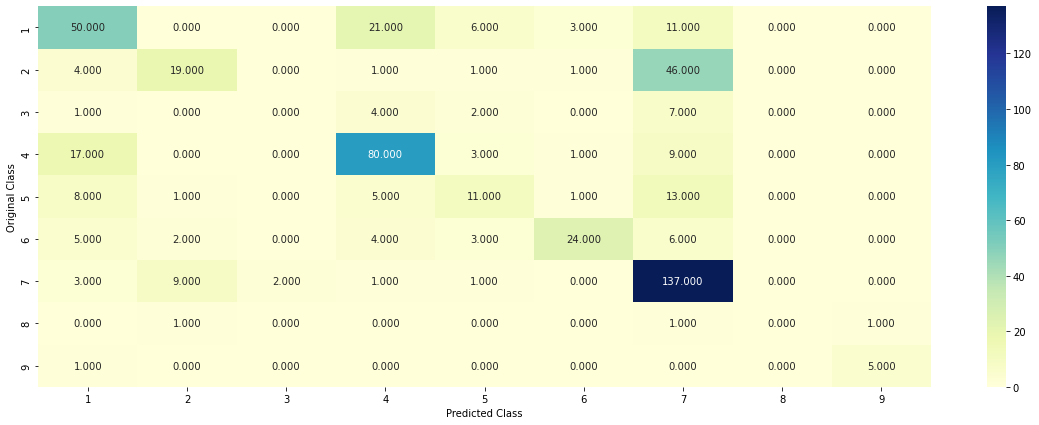

-------------------- Precision matrix (Columm Sum=1) --------------------


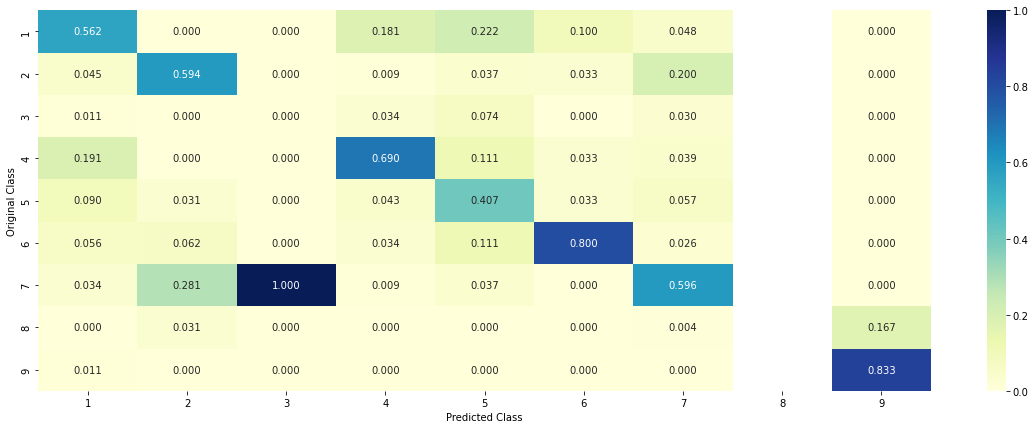

-------------------- Recall matrix (Row sum=1) --------------------


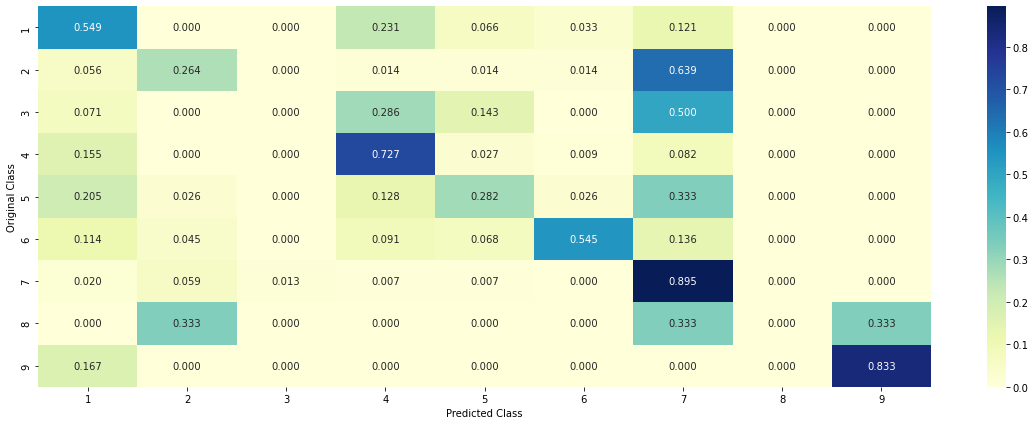

In [168]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=nb_best_hyperparameter)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [73]:
test_point_index = 20
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices=np.argsort(abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0662 0.0781 0.0214 0.6804 0.0414 0.0373 0.0663 0.0051 0.0037]]
Actual Class : 4
--------------------------------------------------
1 Gene feature [tp53] present in test data point [True]
12 Text feature [protein] present in test data point [True]
13 Text feature [function] present in test data point [True]
15 Text feature [proteins] present in test data point [True]
18 Text feature [mammalian] present in test data point [True]
19 Text feature [activity] present in test data point [True]
21 Text feature [partially] present in test data point [True]
23 Text feature [functional] present in test data point [True]
25 Text feature [retained] present in test data point [True]
27 Text feature [results] present in test data point [True]
28 Text feature [suppressor] present in test data point [True]
29 Text feature [determined] present in test data point [True]
31 Text feature [type] present in test data point [True]
34 Text feature [whereas

In [74]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             501
Gene          TP53
Variation    S241Y
Class            4
Name: 501, dtype: object
TEXT:   abstract purpose adrenocortical carcinoma acc rare pediatric malignancy occurs excess among individuals li fraumeni syndrome results primarily germline mutations tp53 gene prior series exploring frequencies germline tp53 mutation among children acc small geographically limited subject referral bias functional consequence mutations related phenotype provide genotype phenotype analysis tp53 mutations pediatric acc propose model tissue specific effects based adrenocortical ontogeny patients methods eighty eight consecutive unrelated children acc unselected family history underwent germline tp53 sequencing rate distribution mutations identified functional analysis performed novel tp53 variants correlation international agency research cancer p53 database delineated mutational distribution association family history risk multiple primary malignancies mpms results germline mutations p

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [75]:
test_point_index = 25
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5856 0.0902 0.0246 0.1228 0.0474 0.0428 0.0766 0.0058 0.0042]]
Actual Class : 5
--------------------------------------------------
6 Gene feature [vhl] present in test data point [True]
11 Text feature [function] present in test data point [True]
12 Text feature [protein] present in test data point [True]
14 Text feature [type] present in test data point [True]
15 Text feature [dna] present in test data point [True]
16 Text feature [one] present in test data point [True]
17 Text feature [two] present in test data point [True]
18 Text feature [wild] present in test data point [True]
19 Text feature [containing] present in test data point [True]
20 Text feature [fraction] present in test data point [True]
21 Text feature [possible] present in test data point [True]
25 Text feature [sequence] present in test data point [True]
26 Text feature [four] present in test data point [True]
27 Text feature [reduced] present in test data point 

In [76]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID            1594
Gene           VHL
Variation    L128F
Class            5
Name: 1594, dtype: object
TEXT:   examined biogenesis von hippel lindau vhl tumor suppressor protein pvhl vitro vivo pvhl formed complex cytosolic chaperonin containing tcp 1 cct tric en route assembly elongin b c subsequent formation vcb cul2 ubiquitin ligase blocking interaction pvhl elongin b c resulted accumulation pvhl within cct complex pvhl present purified vhl cct complexes added rabbit reticulocyte lysate proceeded form vcb vcb cul2 thus cct likely functions least part retaining vhl chains pending availability elongin b c final folding assembly tumor associated mutations within exon ii vhl syndrome diverse effects upon stability function pvhl containing complexes first pvhl mutant lacking entire region encoded exon ii bind cct yet could still assemble complexes elongin b c elongin b c cul2 second number tumor derived missense mutations exon ii decrease cct binding detectable effect upon vcb cul2 assemb

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

best hyperparameter:  {'n_neighbors': 221}


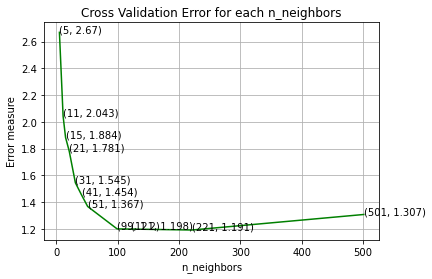

For values of best K =  221 The train log loss is: 1.0136961020337314
For values of best K =  221 The cross validation log loss is: 1.150619235271996
For values of best K =  221 The test log loss is: 1.1648234878512604


In [169]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


cv_log_error_array=[]

alpha = {'n_neighbors':[5, 11, 15, 21, 31, 41, 51, 99, 121, 221, 501]} # hyperparam for KNeighborsClassifier
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, alpha, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_x_responseCoding, train_y)
cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))
print("best hyperparameter: ",clf.best_params_)
knn_best_hyperparameter = clf.best_params_['n_neighbors']
#print(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha['n_neighbors'], cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha['n_neighbors'][i],np.round(txt,3)), (alpha['n_neighbors'][i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Error measure")
plt.show()


#best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=knn_best_hyperparameter)
clf.fit(train_x_responseCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, y_train)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best K = ', knn_best_hyperparameter, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best K = ', knn_best_hyperparameter, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best K = ', knn_best_hyperparameter, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
knn_logloss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

In [170]:
knn_best_hyperparameter

221

In [171]:
knn_logloss

1.1648234878512604

<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.150619235271996
Number of mis-classified points : 0.41729323308270677
-------------------- Confusion matrix --------------------


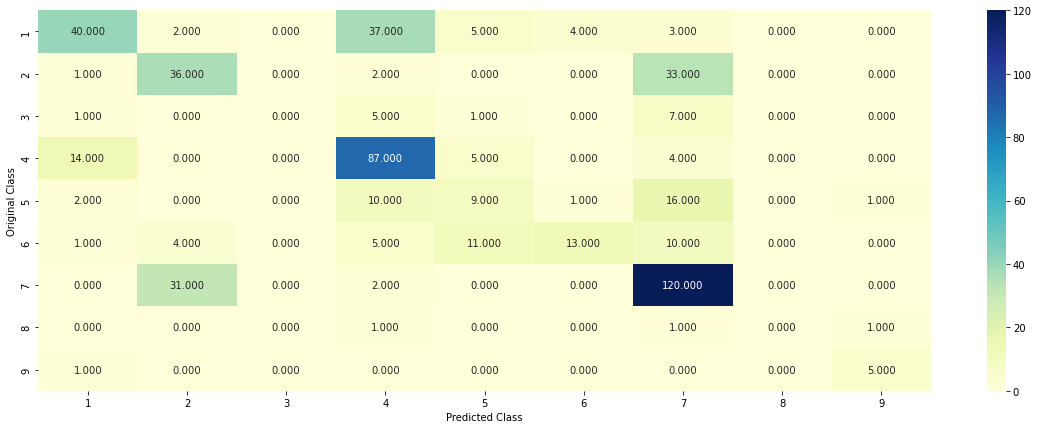

-------------------- Precision matrix (Columm Sum=1) --------------------


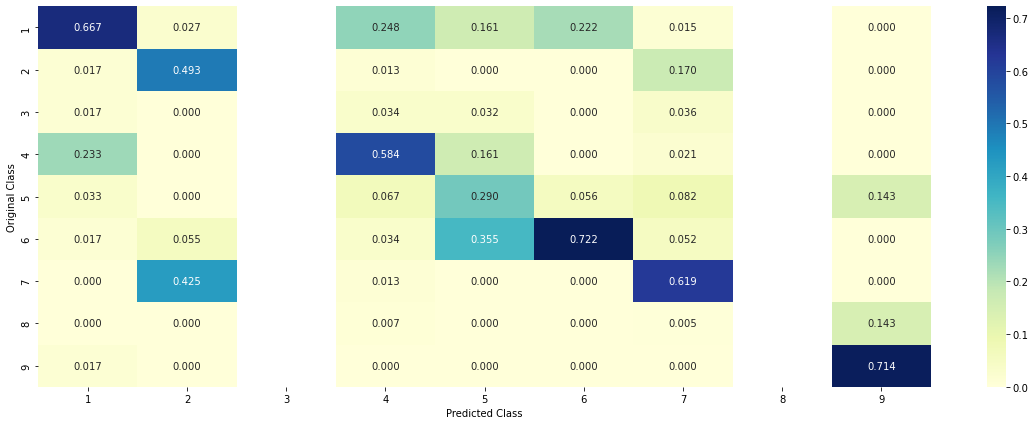

-------------------- Recall matrix (Row sum=1) --------------------


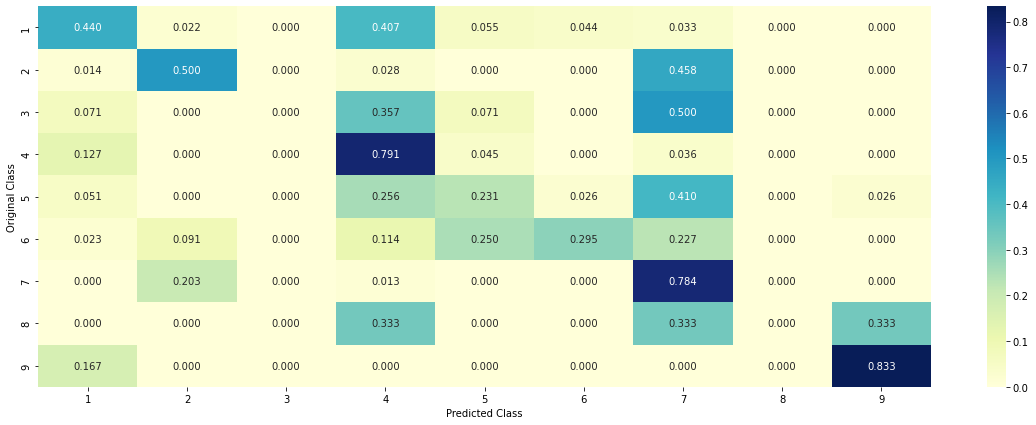

In [78]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=knn_best_hyperparameter)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [82]:
#clf = KNeighborsClassifier(n_neighbors=knn_best_hyperparameter)
#clf.fit(train_x_responseCoding, train_y)
#sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 10
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), n_neighbors=knn_best_hyperparameter)
print("The ",knn_best_hyperparameter," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
The  221  nearest neighbours of the test points belongs to classes [3 3 3 3 5 3 2 7 7 5 5 7 3 5 7 7 7 7 7 7 7 2 7 5 3 3 7 7 5 7 7 7 7 7 2 2 2
 7 7 5 7 2 3 3 3 3 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 3 7 3 2 7 7 7 7 7 3 1 5 3
 3 7 4 7 7 7 7 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 3 3 7 3 7 3 7 7 7 3 3 3 7
 7 7 7 7 1 7 7 7 6 7 7 7 2 7 7 2 3 7 7 7 5 7 7 7 7 7 7 7 7 7 2 7 7 7 7 5 7
 7 5 6 7 7 7 7 7 7 7 7 7 7 5 7 7 6 6 5 2 7 7 7 7 2 7 7 7 7 7 6 7 7 7 2 7 7
 7 7 7 7 2 7 7 5 7 2 7 7 7 7 7 7 7 2 6 2 2 7 2 7 7 7 7 5 7 7 2 7 7 7 7 7]
Fequency of nearest points : Counter({7: 151, 3: 25, 2: 21, 5: 15, 6: 6, 1: 2, 4: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [83]:
#clf = KNeighborsClassifier(n_neighbors=knn_best_hyperparameter)
#clf.fit(train_x_responseCoding, train_y)
#sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 5
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), n_neighbors=knn_best_hyperparameter)
print("The ",knn_best_hyperparameter," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 5
The  221  nearest neighbours of the test points belongs to classes [7 3 7 5 5 7 2 3 3 5 3 3 3 5 7 7 7 7 7 7 7 7 7 7 7 7 2 7 2 7 7 5 3 3 7 7 5
 2 5 7 2 7 2 7 7 7 7 7 7 7 7 7 7 7 3 3 2 7 3 3 3 3 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 3 3 3 1 7 4 5 7 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 3 7 7 3 3 7 7 3
 7 3 3 3 7 7 1 7 7 7 6 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 7 2 7 7 2 7 7 7 5
 5 3 7 7 2 7 7 6 6 7 7 7 7 7 2 5 7 7 6 7 7 7 7 7 7 5 7 7 7 2 6 7 2 7 7 7 5
 7 7 7 7 7 5 7 7 7 7 7 7 7 7 2 7 7 7 7 2 7 2 7 7 7 7 2 7 2 7 7 6 7 7 2 7]
Fequency of nearest points : Counter({7: 152, 3: 25, 2: 21, 5: 14, 6: 6, 1: 2, 4: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

best hyperparameter:  {'alpha': 0.001}


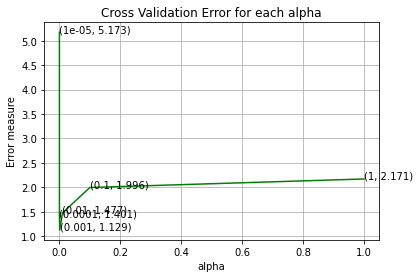

For values of best alpha =  0.001 The train log loss is: 0.5239787644539268
For values of best alpha =  0.001 The cross validation log loss is: 1.131333940316577
For values of best alpha =  0.001 The test log loss is: 1.0528341100130267


In [185]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------



cv_log_error_array=[]

alpha = {'alpha':[10 ** x for x in range(-5, 1)]}  # hyperparam for SGD classifier
lr = SGDClassifier(class_weight='balanced', penalty='l2', loss='log', random_state=42)
clf = GridSearchCV(lr, alpha, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_x_onehotCoding, train_y)
cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))
print("best hyperparameter: ",clf.best_params_)
lr_best_hyperparameter_balancing = clf.best_params_['alpha']
#print(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha['alpha'], cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha['alpha'][i],np.round(txt,3)), (alpha['alpha'][i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("alpha")
plt.ylabel("Error measure")
plt.show()



clf = SGDClassifier(class_weight='balanced', alpha=lr_best_hyperparameter_balancing, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', lr_best_hyperparameter_balancing, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', lr_best_hyperparameter_balancing, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', lr_best_hyperparameter_balancing, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
lr_logloss_balancing = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

In [186]:
lr_best_hyperparameter_balancing

0.001

In [187]:
lr_logloss_balancing

1.0528341100130267

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.131333940316577
Number of mis-classified points : 0.35902255639097747
-------------------- Confusion matrix --------------------


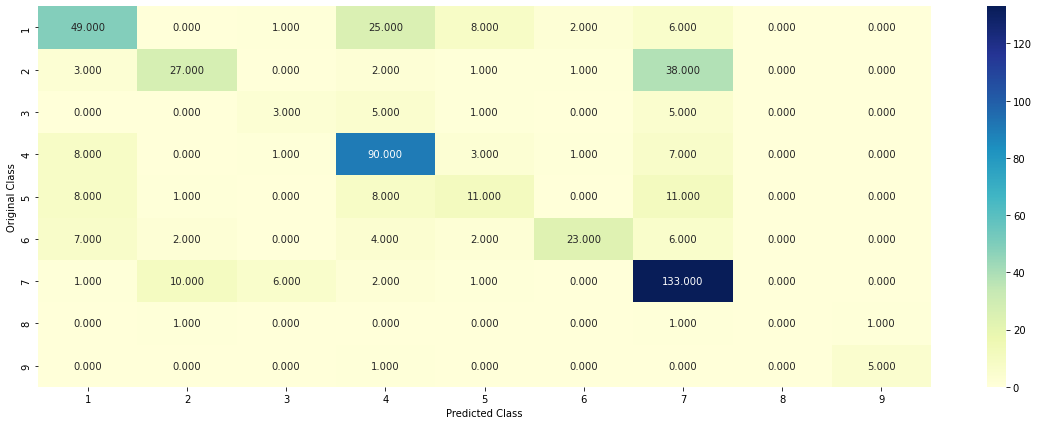

-------------------- Precision matrix (Columm Sum=1) --------------------


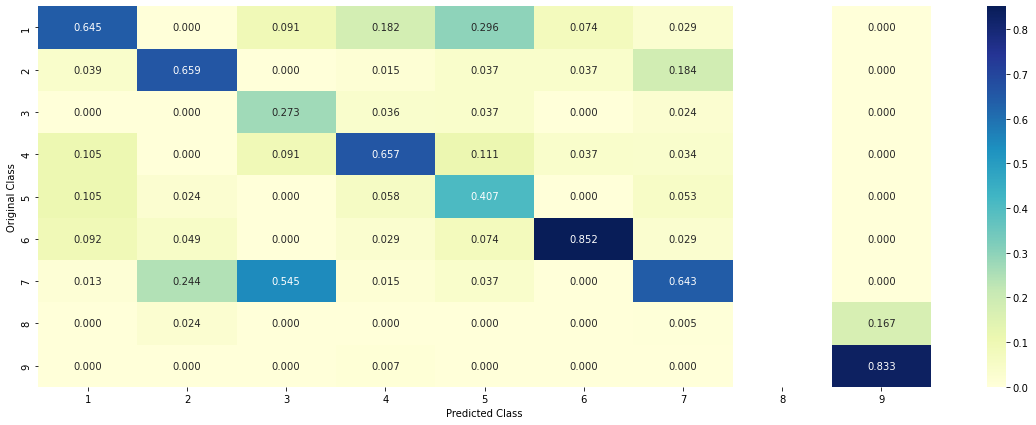

-------------------- Recall matrix (Row sum=1) --------------------


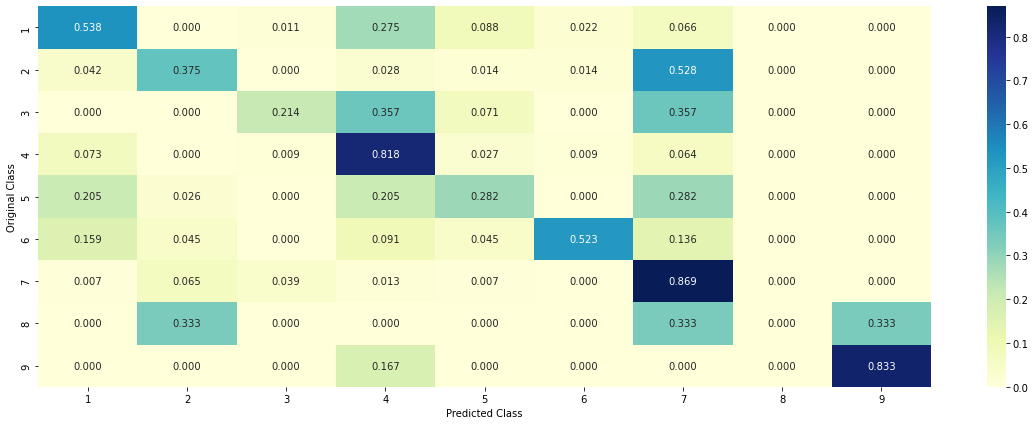

In [188]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=lr_best_hyperparameter_balancing, penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [88]:
#clf = SGDClassifier(class_weight='balanced', alpha=lr_best_hyperparameter_balancing, penalty='l2', loss='log', random_state=42)
#clf.fit(train_x_onehotCoding,train_y)
test_point_index = 20
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2619 0.0225 0.0044 0.661  0.0137 0.0117 0.0175 0.0045 0.0028]]
Actual Class : 4
--------------------------------------------------
94 Text feature [generated] present in test data point [True]
216 Text feature [older] present in test data point [True]
242 Text feature [brazil] present in test data point [True]
345 Text feature [finally] present in test data point [True]
352 Text feature [criteria] present in test data point [True]
430 Text feature [adolescence] present in test data point [True]
496 Text feature [gradual] present in test data point [True]
Out of the top  500  features  7 are present in query point


In [89]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             501
Gene          TP53
Variation    S241Y
Class            4
Name: 501, dtype: object
TEXT:   abstract purpose adrenocortical carcinoma acc rare pediatric malignancy occurs excess among individuals li fraumeni syndrome results primarily germline mutations tp53 gene prior series exploring frequencies germline tp53 mutation among children acc small geographically limited subject referral bias functional consequence mutations related phenotype provide genotype phenotype analysis tp53 mutations pediatric acc propose model tissue specific effects based adrenocortical ontogeny patients methods eighty eight consecutive unrelated children acc unselected family history underwent germline tp53 sequencing rate distribution mutations identified functional analysis performed novel tp53 variants correlation international agency research cancer p53 database delineated mutational distribution association family history risk multiple primary malignancies mpms results germline mutations p

In [90]:
clf.coef_.shape

(9, 54204)

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [92]:
test_point_index = 50
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0329 0.0278 0.2678 0.606  0.0192 0.0137 0.0238 0.005  0.0038]]
Actual Class : 3
--------------------------------------------------
7 Text feature [materials] present in test data point [True]
114 Text feature [polymorphism] present in test data point [True]
133 Text feature [changes] present in test data point [True]
352 Text feature [criteria] present in test data point [True]
361 Text feature [loci] present in test data point [True]
Out of the top  500  features  5 are present in query point


In [93]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             1005
Gene           TSC1
Variation    G1035S
Class             3
Name: 1005, dtype: object
TEXT:   tuberous sclerosis complex tsc autosomal dominant disorder characterised development hamartomas variety organs tissues disease caused mutations either tsc1 gene chromosome 9q34 tsc2 gene chromosome 16p13 3 tsc1 tsc2 gene products tsc1 tsc2 interact form protein complex inhibits signal transduction downstream effectors mammalian target rapamycin mtor investigate effects putative tsc1 missense mutations identified individuals signs symptoms tsc tsc1 tsc2 complex formation mtor signalling show specific amino acid substitutions close n terminal tsc1 reduce steady state levels tsc1 resulting activation mtor signalling leading symptoms tsc keywords tuberous sclerosis complex tsc1 tsc2 go introduction tuberous sclerosis complex tsc autosomal dominant disorder characterised development hamartomas variety organs tissues including brain skin kidneys 1 2 mutations either tsc1 gene chr

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

best hyperparameter:  {'alpha': 0.001}


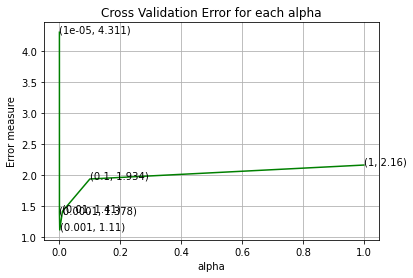

For values of best alpha =  0.001 The train log loss is: 0.5239787644539268
For values of best alpha =  0.001 The cross validation log loss is: 1.131333940316577
For values of best alpha =  0.001 The test log loss is: 1.0528341100130267


In [189]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


cv_log_error_array=[]

alpha = {'alpha':[10 ** x for x in range(-5, 1)]}  # hyperparam for SGD classifier
lr = SGDClassifier(penalty='l2', loss='log', random_state=42)
clf = GridSearchCV(lr, alpha, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_x_onehotCoding, train_y)
cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))
print("best hyperparameter: ",clf.best_params_)
lr_best_hyperparameter_without_balancing = clf.best_params_['alpha']
#print(cv_log_error_array)
fig, ax = plt.subplots()
ax.plot(alpha['alpha'], cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha['alpha'][i],np.round(txt,3)), (alpha['alpha'][i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("alpha")
plt.ylabel("Error measure")
plt.show()



clf = SGDClassifier(class_weight='balanced', alpha=lr_best_hyperparameter_without_balancing, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', lr_best_hyperparameter_without_balancing, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', lr_best_hyperparameter_without_balancing, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', lr_best_hyperparameter_without_balancing, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
lr_logloss_without_balancing= log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

In [190]:
lr_logloss_without_balancing

1.0528341100130267

In [191]:
lr_best_hyperparameter_without_balancing

0.001

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.1573184438240645
Number of mis-classified points : 0.35526315789473684
-------------------- Confusion matrix --------------------


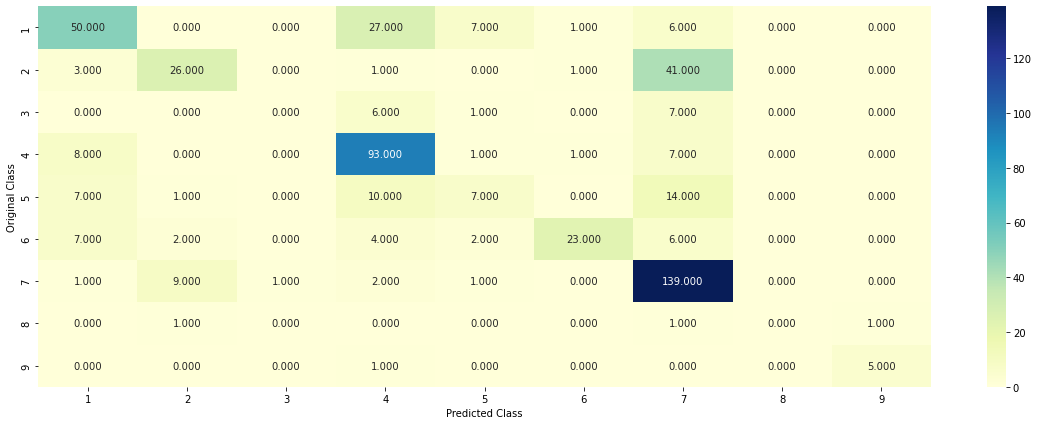

-------------------- Precision matrix (Columm Sum=1) --------------------


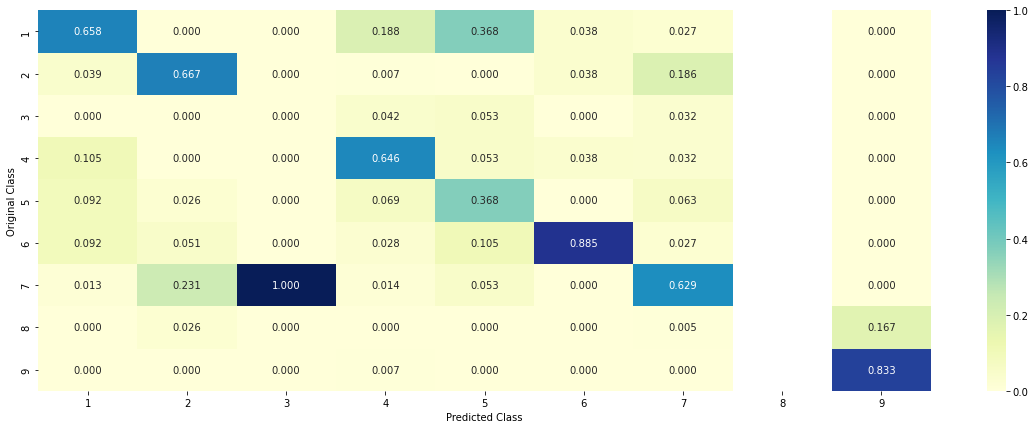

-------------------- Recall matrix (Row sum=1) --------------------


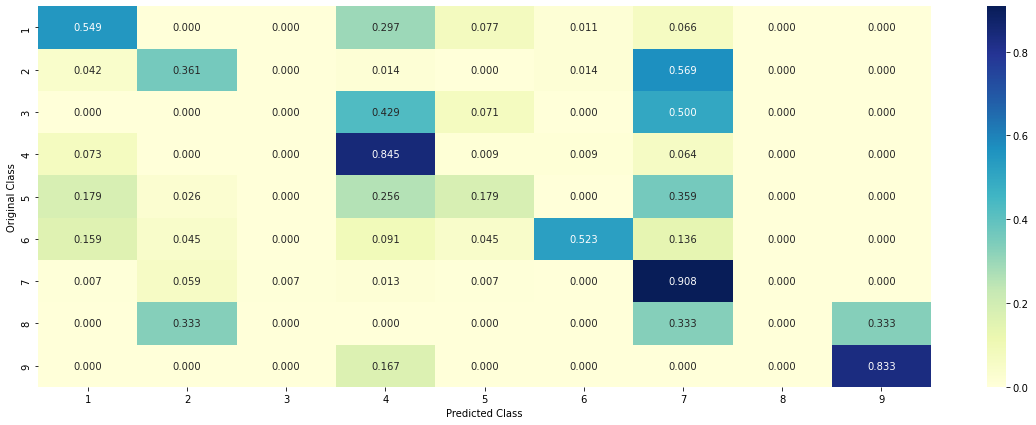

In [192]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=lr_best_hyperparameter_without_balancing, penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [104]:
#clf = SGDClassifier(alpha=lr_best_hyperparameter, penalty='l2', loss='log', random_state=42)
#clf.fit(train_x_onehotCoding,train_y)
test_point_index = 27
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.511e-01 6.100e-03 1.300e-03 2.820e-02 3.300e-03 2.000e-03 3.300e-03
  3.800e-03 9.000e-04]]
Actual Class : 1
--------------------------------------------------
6 Gene feature [tp53] present in test data point [True]
495 Text feature [rome] present in test data point [True]
498 Text feature [p73] present in test data point [True]
Out of the top  500  features  3 are present in query point


In [105]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             434
Gene          TP53
Variation    R110P
Class            1
Name: 434, dtype: object
TEXT:   many p53 missense mutations possess dominant negative activity oncogenic gain function report structurally destabilized p53 mutants effects result mutant induced coaggregation wild type p53 paralogs p63 p73 thereby also inducing heat shock response aggregation mutant p53 resulted self assembly conserved aggregation nucleating sequence within hydrophobic core dna binding domain becomes exposed mutation suppressing aggregation propensity sequence mutagenesis abrogated gain function restored activity wild type p53 paralogs p53 germline mutation database tumors carrying aggregation prone p53 mutations significantly lower frequency wild type allele loss compared tumors harboring nonaggregating mutations suggesting difference clonal selection aggregating mutants overall study reveals novel disease mechanism mutant p53 gain function suggests least respects cancer could considered aggre

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [108]:
test_point_index = 15
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1452 0.0487 0.0114 0.1021 0.387  0.253  0.0421 0.0052 0.0052]]
Actual Class : 6
--------------------------------------------------
0 Gene feature [brca1] present in test data point [True]
214 Text feature [m1652i] present in test data point [True]
244 Text feature [v1833m] present in test data point [True]
308 Text feature [s1613c] present in test data point [True]
473 Text feature [identified] present in test data point [True]
Out of the top  500  features  5 are present in query point


In [109]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             2476
Gene          BRCA1
Variation    V1804A
Class             6
Name: 2476, dtype: object
TEXT:   abstract germline mutations inactivate tumor suppressor gene brca1 associated increased risk cancers breast tissues functional consequence many missense variants found human population uncertain several predictive methods proposed distinguish cancer predisposing missense mutations harmless polymorphisms including small colony phenotype scp assay performed model organism yeast saccharomyces cerevisiae goal study evaluate colony size assay constructed 28 missense mutations throughout c terminal 305 amino acid residues brca1 mutated proteins expressed yeast evaluated using scp assay conclude yet evidence assay identify inactivating mutations upstream brct repeats however within brct repeats results assay general agreement predictions based structural modeling vitro vivo assays cross species sequence conservation thus yeast assay appears provide confirmatory vivo evidence aid c

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.3147274229722772
for C = 0.0001
Log Loss : 1.2430897805936454
for C = 0.001
Log Loss : 1.1756185868187226
for C = 0.01
Log Loss : 1.1660927608703149
for C = 0.1
Log Loss : 1.381555772181196
for C = 1
Log Loss : 1.6895703718182378
for C = 10
Log Loss : 1.7001416496673878
for C = 100
Log Loss : 1.700141850618803


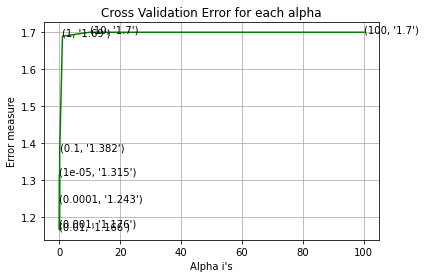

For values of best alpha =  0.01 The train log loss is: 0.7372041539471627
For values of best alpha =  0.01 The cross validation log loss is: 1.1660927608703149
For values of best alpha =  0.01 The test log loss is: 1.1169368960094084


In [195]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
svm_hyperparameter = alpha[best_alpha]
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
svm_logloss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

In [196]:
svm_hyperparameter

0.01

In [197]:
svm_logloss

1.1169368960094084

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.1660927608703149
Number of mis-classified points : 0.35902255639097747
-------------------- Confusion matrix --------------------


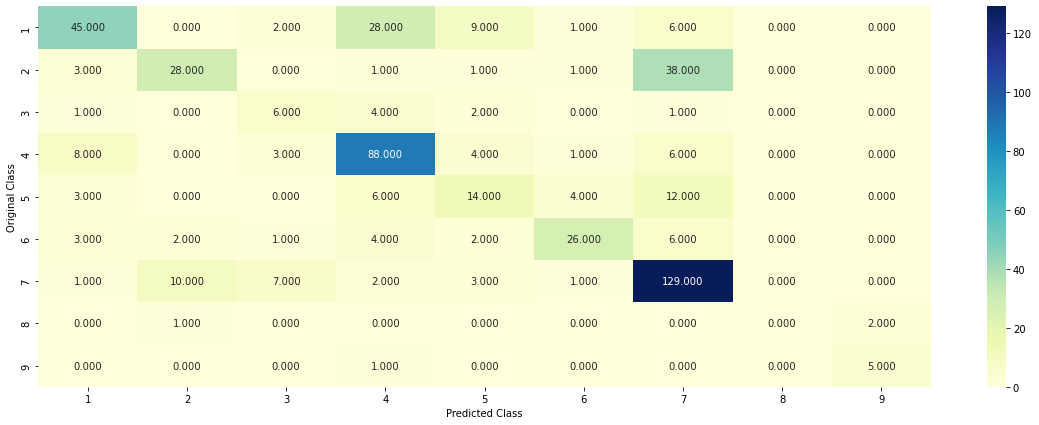

-------------------- Precision matrix (Columm Sum=1) --------------------


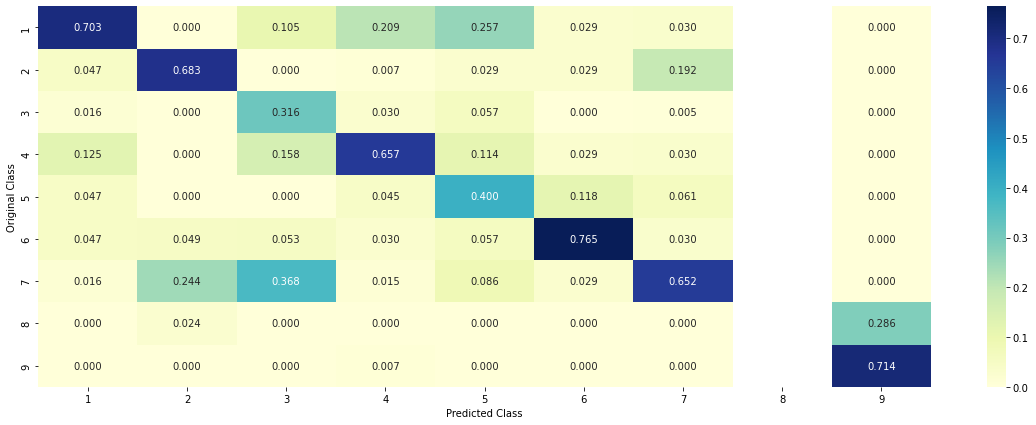

-------------------- Recall matrix (Row sum=1) --------------------


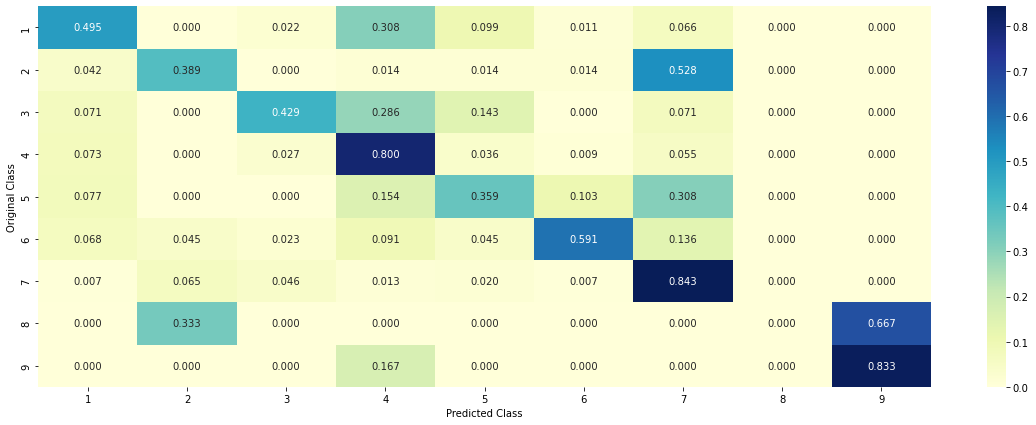

In [199]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [142]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2177 0.0864 0.0161 0.3782 0.0673 0.0427 0.1795 0.0068 0.0054]]
Actual Class : 4
--------------------------------------------------
4 Gene feature [tp53] present in test data point [True]
168 Text feature [microscopy] present in test data point [True]
174 Text feature [mgcl] present in test data point [True]
190 Text feature [1250] present in test data point [True]
231 Text feature [suppressor] present in test data point [True]
454 Text feature [tagged] present in test data point [True]
Out of the top  500  features  6 are present in query point


In [144]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             439
Gene          TP53
Variation    N239S
Class            4
Name: 439, dtype: object
TEXT:   abstract loss wild type p53 tumor suppressive function oncogenic gain function p53 mutants showing important implications tumorigenesis p53n236s p53n239s human p53s mutation shown lose wild type p53 function yeast assay however gain function still clear gel shift assay showed mutant p53s lost dna binding ability target promoters real time pcr data confirmed p53s lost function regulating transcription p21 cip1 waf1 cyclin g puma bax response 10gy irradiation data confirmed loss function p53s mammalian cells xenograft assay showed p53s per se oncogenic enough form tumor however cooperating h rasv12 p53s could dramatically promote tumorigenesis p53 null mefs study showed co expression p53s h rasv12 could increase expression level h rasv12 partially eliminate elevation stress response proteins chk2 h2ax hsp70 rb p16ink4a caused either p53s h rasv12 data suggested p53s cross talked h

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [145]:
test_point_index = 15
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1131 0.097  0.0191 0.1406 0.3338 0.1337 0.1496 0.0069 0.0062]]
Actual Class : 6
--------------------------------------------------
0 Gene feature [brca1] present in test data point [True]
82 Text feature [m1652i] present in test data point [True]
434 Text feature [v1833m] present in test data point [True]
456 Text feature [s1613c] present in test data point [True]
Out of the top  500  features  4 are present in query point


In [146]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             2476
Gene          BRCA1
Variation    V1804A
Class             6
Name: 2476, dtype: object
TEXT:   abstract germline mutations inactivate tumor suppressor gene brca1 associated increased risk cancers breast tissues functional consequence many missense variants found human population uncertain several predictive methods proposed distinguish cancer predisposing missense mutations harmless polymorphisms including small colony phenotype scp assay performed model organism yeast saccharomyces cerevisiae goal study evaluate colony size assay constructed 28 missense mutations throughout c terminal 305 amino acid residues brca1 mutated proteins expressed yeast evaluated using scp assay conclude yet evidence assay identify inactivating mutations upstream brct repeats however within brct repeats results assay general agreement predictions based structural modeling vitro vivo assays cross species sequence conservation thus yeast assay appears provide confirmatory vivo evidence aid c

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [201]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

param_dist = {"n_estimators":[20,50,100],
              "max_depth": [3,7,10],
              "min_samples_split": [8, 10, 12],
              "min_samples_leaf": [3,5,10]}


rf = RandomForestClassifier(random_state=25,n_jobs=-1, criterion='gini')  # hyperparam for RandomForestClassifier
#lr = SGDClassifier(penalty='l2', loss='log', random_state=42)
clf = GridSearchCV(rf, param_dist, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_x_onehotCoding, train_y)
#cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))

print("best hyperparameter: ",clf.best_params_)
rf_best_hyperparameter = clf.best_params_

clf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'] , criterion='gini', 
                    max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], 
                    min_samples_leaf=clf.best_params_['min_samples_leaf'], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

print("="*50)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print("For values of best estimator the train log loss is:" ,log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print("For values of best estimator the cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print("For values of best estimator the test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
rf_logloss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

best hyperparameter:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
For values of best estimator the train log loss is: 0.8085788961201639
For values of best estimator the cross validation log loss is: 1.1951297109992989
For values of best estimator the test log loss is: 1.1710941855840549


In [203]:
rf_logloss

1.1710941855840549

In [202]:
rf_best_hyperparameter

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1951297109992987
Number of mis-classified points : 0.3815789473684211
-------------------- Confusion matrix --------------------


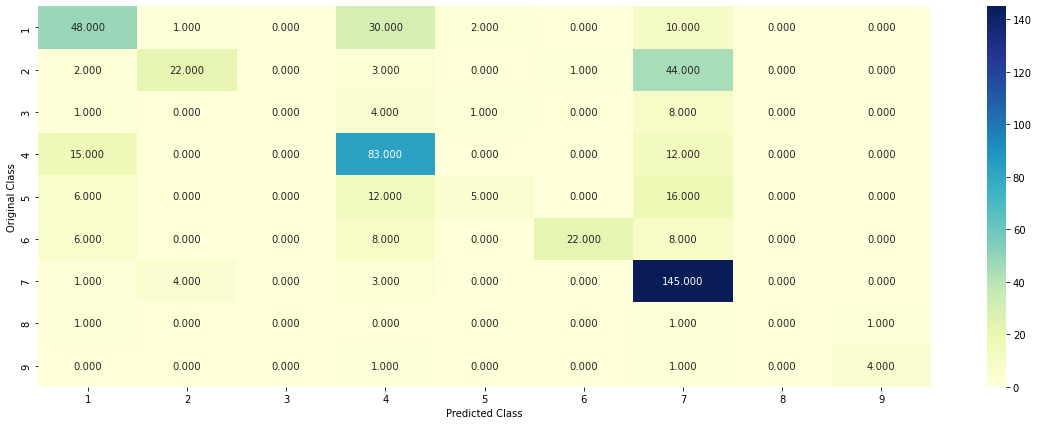

-------------------- Precision matrix (Columm Sum=1) --------------------


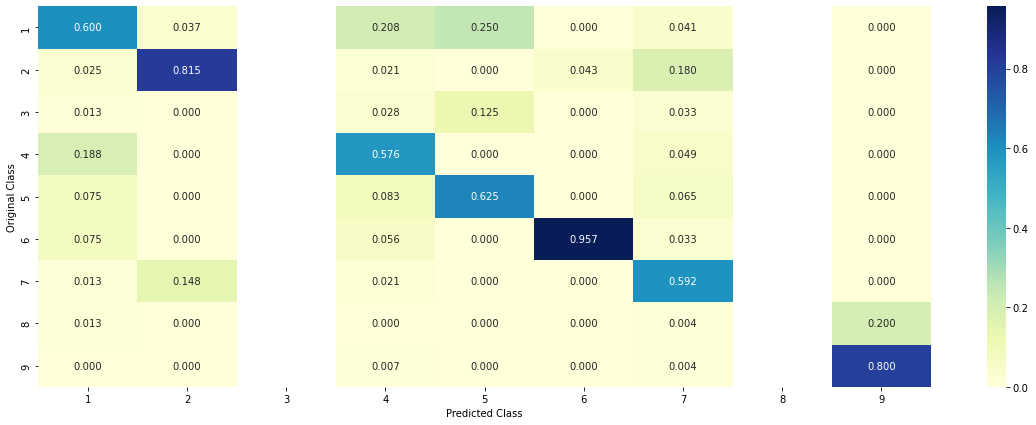

-------------------- Recall matrix (Row sum=1) --------------------


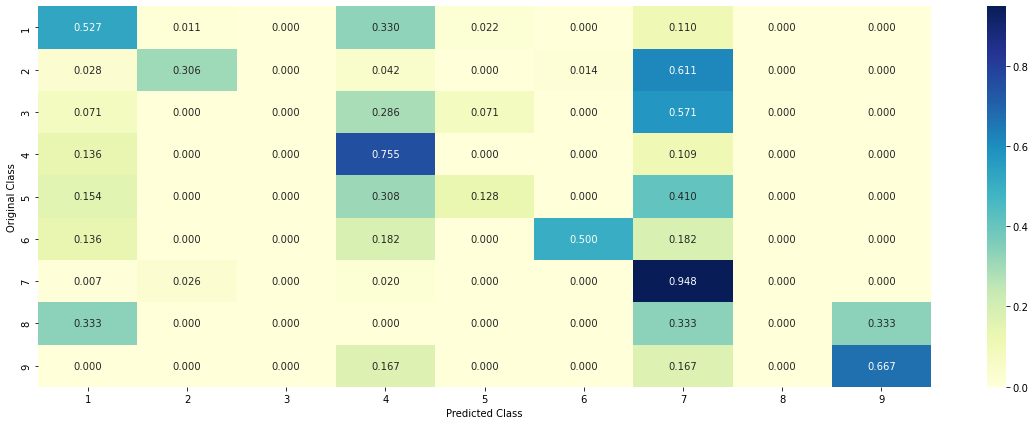

In [204]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=rf_best_hyperparameter['n_estimators'] ,min_samples_split=rf_best_hyperparameter['min_samples_split'] ,criterion='gini', max_depth=rf_best_hyperparameter['max_depth'],min_samples_leaf=rf_best_hyperparameter['min_samples_leaf'] ,random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [123]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=rf_best_hyperparameter['n_estimators'] ,min_samples_split=rf_best_hyperparameter['min_samples_split'] ,criterion='gini', max_depth=rf_best_hyperparameter['max_depth'],min_samples_leaf=rf_best_hyperparameter['min_samples_leaf'] ,random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

#print(clf.feature_importances_)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
#print(clf.feature_importances_)
print(len(indices))

print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index].lower(),test_df['Variation'].iloc[test_point_index].lower(), no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2582 0.1106 0.0224 0.3008 0.0563 0.051  0.1852 0.0075 0.0082]]
Actual Class : 4
54204
--------------------------------------------------
3 Text feature [function] present in test data point [True]
6 Text feature [treatment] present in test data point [True]
8 Text feature [loss] present in test data point [True]
9 Text feature [proliferation] present in test data point [True]
10 Text feature [suppressor] present in test data point [True]
13 Text feature [survival] present in test data point [True]
15 Text feature [akt] present in test data point [True]
16 Text feature [oncogenic] present in test data point [True]
18 Text feature [activated] present in test data point [True]
20 Text feature [serum] present in test data point [True]
22 Text feature [cells] present in test data point [True]
30 Text feature [yeast] present in test data point [True]
31 Text feature [kinase] present in test data point [True]
33 Text feature [antibodies] 

In [124]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             439
Gene          TP53
Variation    N239S
Class            4
Name: 439, dtype: object
TEXT:   abstract loss wild type p53 tumor suppressive function oncogenic gain function p53 mutants showing important implications tumorigenesis p53n236s p53n239s human p53s mutation shown lose wild type p53 function yeast assay however gain function still clear gel shift assay showed mutant p53s lost dna binding ability target promoters real time pcr data confirmed p53s lost function regulating transcription p21 cip1 waf1 cyclin g puma bax response 10gy irradiation data confirmed loss function p53s mammalian cells xenograft assay showed p53s per se oncogenic enough form tumor however cooperating h rasv12 p53s could dramatically promote tumorigenesis p53 null mefs study showed co expression p53s h rasv12 could increase expression level h rasv12 partially eliminate elevation stress response proteins chk2 h2ax hsp70 rb p16ink4a caused either p53s h rasv12 data suggested p53s cross talked h

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [125]:
test_point_index = 15
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
#print(clf.feature_importances_)
print(len(indices))

print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.3849 0.0469 0.0207 0.2805 0.1173 0.0875 0.0491 0.0069 0.0064]]
Actual Class : 6
54204
--------------------------------------------------
1 Text feature [activation] present in test data point [True]
2 Text feature [missense] present in test data point [True]
3 Text feature [function] present in test data point [True]
6 Text feature [treatment] present in test data point [True]
10 Text feature [suppressor] present in test data point [True]
19 Text feature [nonsense] present in test data point [True]
22 Text feature [cells] present in test data point [True]
26 Text feature [carriers] present in test data point [True]
28 Text feature [deleterious] present in test data point [True]
29 Text feature [therapy] present in test data point [True]
30 Text feature [yeast] present in test data point [True]
32 Text feature [unclassified] present in test data point [True]
34 Text feature [expression] present in test data point [True]
39 Text feat

In [126]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             2476
Gene          BRCA1
Variation    V1804A
Class             6
Name: 2476, dtype: object
TEXT:   abstract germline mutations inactivate tumor suppressor gene brca1 associated increased risk cancers breast tissues functional consequence many missense variants found human population uncertain several predictive methods proposed distinguish cancer predisposing missense mutations harmless polymorphisms including small colony phenotype scp assay performed model organism yeast saccharomyces cerevisiae goal study evaluate colony size assay constructed 28 missense mutations throughout c terminal 305 amino acid residues brca1 mutated proteins expressed yeast evaluated using scp assay conclude yet evidence assay identify inactivating mutations upstream brct repeats however within brct repeats results assay general agreement predictions based structural modeling vitro vivo assays cross species sequence conservation thus yeast assay appears provide confirmatory vivo evidence aid c

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [234]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

param_dist = {"n_estimators":[20,50,100],
              "max_depth": [3,7,10],
              "min_samples_split": [8, 10, 12],
              "min_samples_leaf": [3,5,10]}


rf = RandomForestClassifier(random_state=25,n_jobs=-1, criterion='gini')  # hyperparam for RandomForestClassifier
#lr = SGDClassifier(penalty='l2', loss='log', random_state=42)
clf = GridSearchCV(rf, param_dist, cv= 5, scoring='neg_log_loss', return_train_score = True,n_jobs = -1)
clf.fit(train_x_responseCoding, train_y)
#cv_log_error_array = list(-(clf.cv_results_['mean_test_score']))

print("best hyperparameter: ",clf.best_params_)
rf_best_hyperparameter_responsecoding = clf.best_params_

clf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'] , criterion='gini', 
                    max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], 
                    min_samples_leaf=clf.best_params_['min_samples_leaf'], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

print("="*50)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print("For values of best estimator the train log loss is:" ,log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print("For values of best estimator the cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print("For values of best estimator the test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
rf_logloss_response = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

best hyperparameter:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}
For values of best estimator the train log loss is: 0.052953817628557255
For values of best estimator the cross validation log loss is: 1.667092451570326
For values of best estimator the test log loss is: 1.6744972091475416


In [235]:
rf_best_hyperparameter_responsecoding

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

In [236]:
rf_logloss_response

1.6744972091475416

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.6576296868589366
Number of mis-classified points : 0.6372180451127819
-------------------- Confusion matrix --------------------


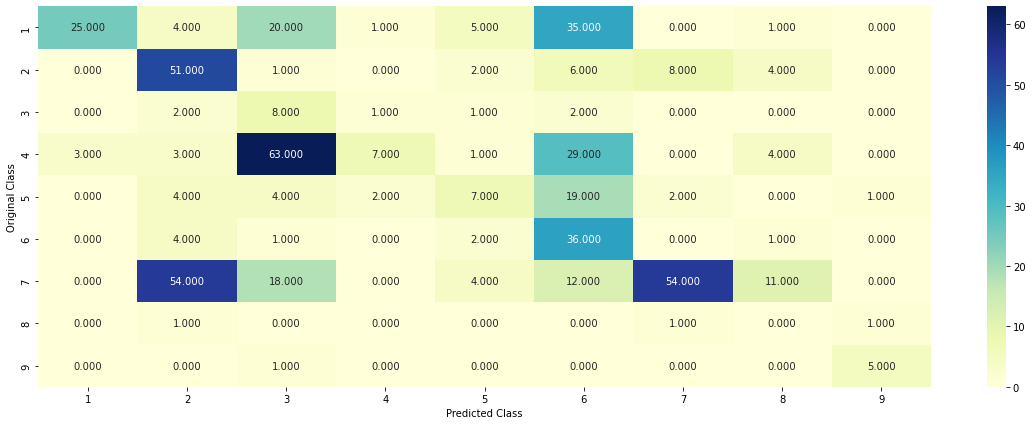

-------------------- Precision matrix (Columm Sum=1) --------------------


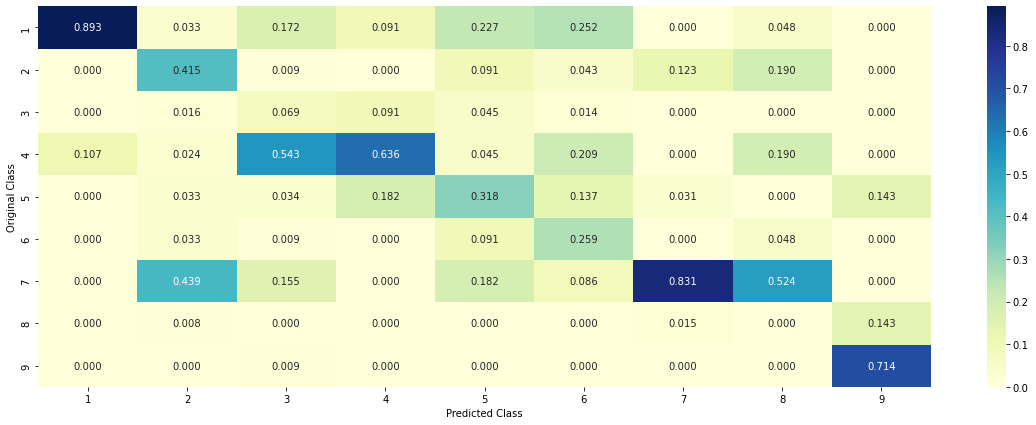

-------------------- Recall matrix (Row sum=1) --------------------


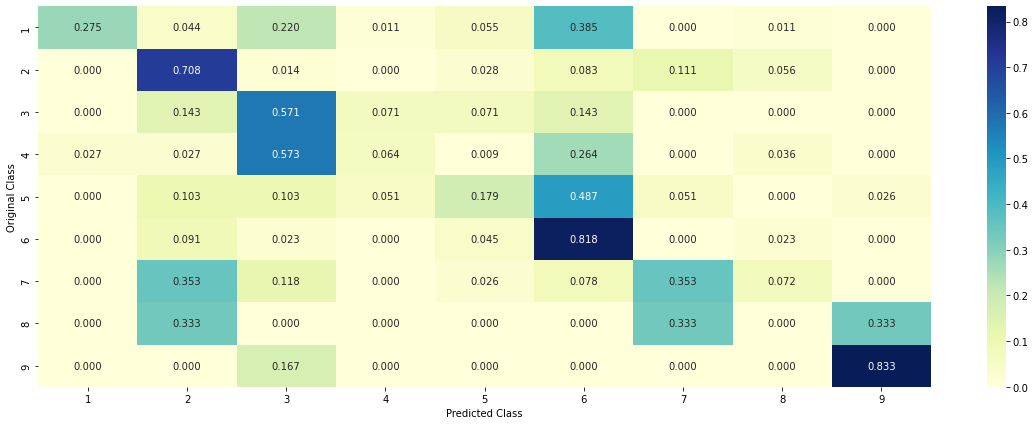

In [237]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=rf_best_hyperparameter['n_estimators'] ,min_samples_split=rf_best_hyperparameter['min_samples_split'] ,criterion='gini', max_depth=rf_best_hyperparameter['max_depth'],min_samples_leaf=rf_best_hyperparameter['min_samples_leaf'] ,random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [134]:
clf = RandomForestClassifier(n_estimators=rf_best_hyperparameter['n_estimators'] ,
                             min_samples_split=rf_best_hyperparameter['min_samples_split'] ,criterion='gini', 
                             max_depth=rf_best_hyperparameter['max_depth'],
                             min_samples_leaf=rf_best_hyperparameter['min_samples_leaf'] ,
                             random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 15
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
#print(indices)
#print(len(indices))
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 6
Predicted Class Probabilities: [[0.0595 0.0229 0.1645 0.1754 0.217  0.2985 0.0252 0.0184 0.0185]]
Actual Class : 6
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Gene is important feature


In [135]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             2476
Gene          BRCA1
Variation    V1804A
Class             6
Name: 2476, dtype: object
TEXT:   abstract germline mutations inactivate tumor suppressor gene brca1 associated increased risk cancers breast tissues functional consequence many missense variants found human population uncertain several predictive methods proposed distinguish cancer predisposing missense mutations harmless polymorphisms including small colony phenotype scp assay performed model organism yeast saccharomyces cerevisiae goal study evaluate colony size assay constructed 28 missense mutations throughout c terminal 305 amino acid residues brca1 mutated proteins expressed yeast evaluated using scp assay conclude yet evidence assay identify inactivating mutations upstream brct repeats however within brct repeats results assay general agreement predictions based structural modeling vitro vivo assays cross species sequence conservation thus yeast assay appears provide confirmatory vivo evidence aid c

<h4>4.5.5.2. Incorrectly Classified point</h4>

In [136]:
test_point_index = 10
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 3
Predicted Class Probabilities: [[0.0211 0.0408 0.6184 0.0269 0.1571 0.0292 0.0784 0.0163 0.0118]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Gene is important feature


In [137]:
# original test point

print(test_df[['ID', 'Gene', 'Variation', 'Class']].iloc[test_point_index])
print("TEXT:  ",test_df['TEXT'].iloc[test_point_index][0:1000],"...")

ID             1517
Gene            ALK
Variation    L1240V
Class             7
Name: 1517, dtype: object
TEXT:   era personalized medicine understanding molecular drivers oncogenesis likely trump morphological characteristics regard diagnostics prognostics choice therapies identifying single driver mutations billions possibilities used require substantial insight however cost deep genomic sequencing goes month clever tricks identifying family cohorts may necessary family cohorts driven genetic discovery decades including identification tumor suppressor genes many oncogenes neuroblastoma lethal cancer early childhood essentially comes two forms highly malignant locally manageable paraphrase audrey evans early leader field good ies bad ies underlying genes responsible neuroblastoma remain largely unknown despite discovery handful genetic changes implicated neuroblastoma development example brodeur et al 1 look et al 2 correlated mycn oncogene amplification aggressive tumors high propens

<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [244]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=lr_best_hyperparameter_balancing, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=svm_hyperparameter, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=nb_best_hyperparameter)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")
stacking_hyperparameter = []
sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error
        stacking_hyperparameter.append(best_alpha)
        
stacking_best_hyperparameter = alpha[np.argmin(stacking_hyperparameter)]

Logistic Regression :  Log Loss: 1.14
Support vector machines : Log Loss: 1.16
Naive Bayes : Log Loss: 1.28
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.812
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.679
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.274
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.203
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.486
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.878


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.50465561979036
Log loss (CV) on the stacking classifier : 1.2033582909476692
Log loss (test) on the stacking classifier : 1.1095828277900683
Number of missclassified point : 0.3323308270676692
-------------------- Confusion matrix --------------------


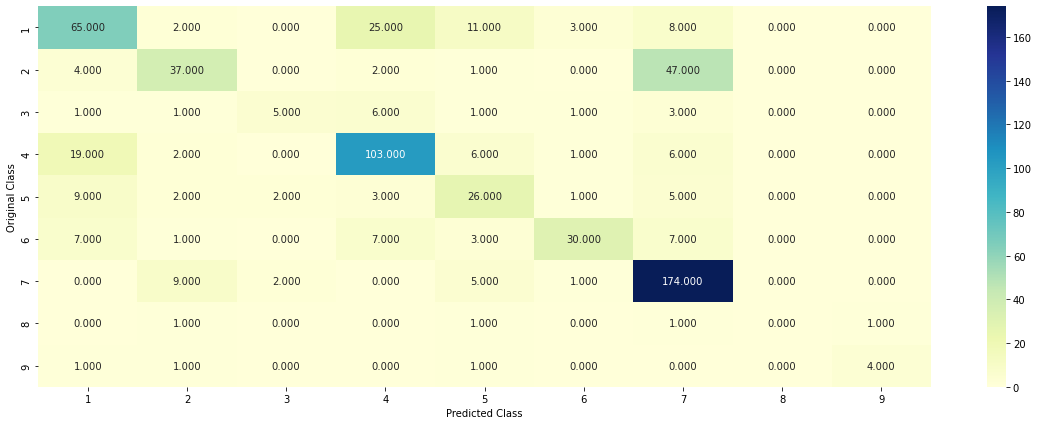

-------------------- Precision matrix (Columm Sum=1) --------------------


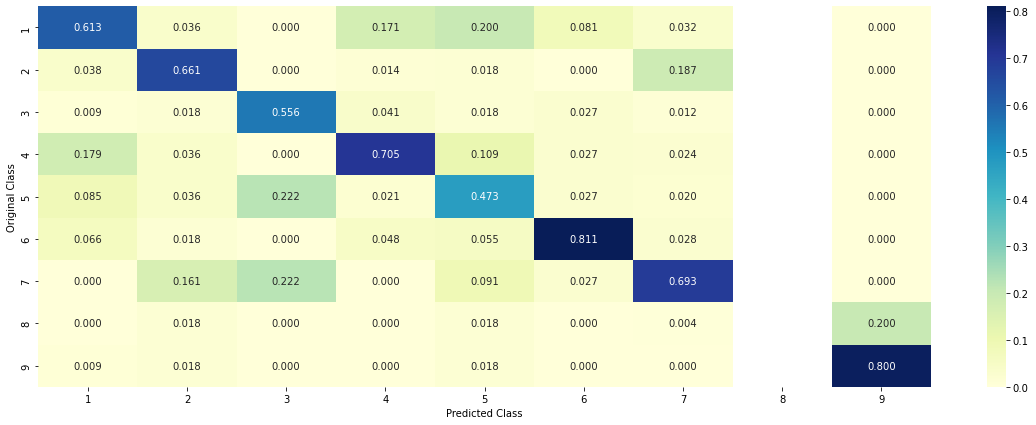

-------------------- Recall matrix (Row sum=1) --------------------


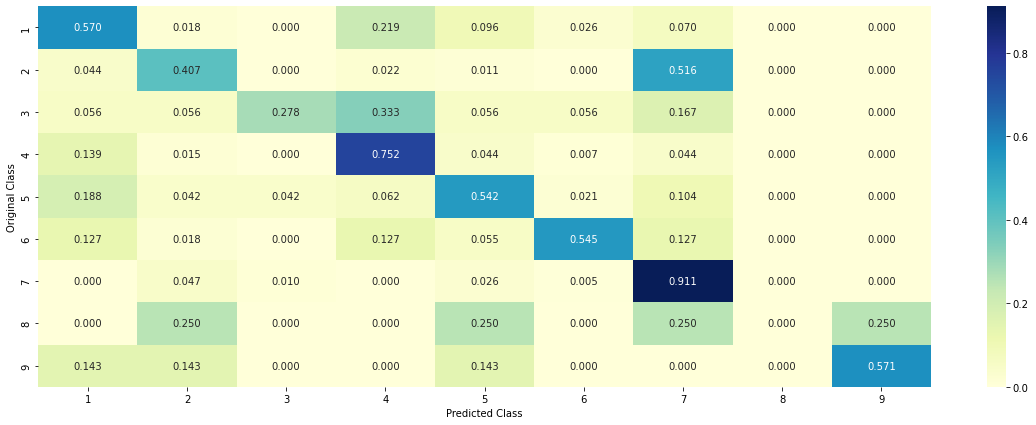

In [246]:
lr = LogisticRegression(C=stacking_best_hyperparameter)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)
stacking_logloss = log_error

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.6739590766334012
Log loss (CV) on the VotingClassifier : 1.103923668495353
Log loss (test) on the VotingClassifier : 1.0522968107999633
Number of missclassified point : 0.3263157894736842
-------------------- Confusion matrix --------------------


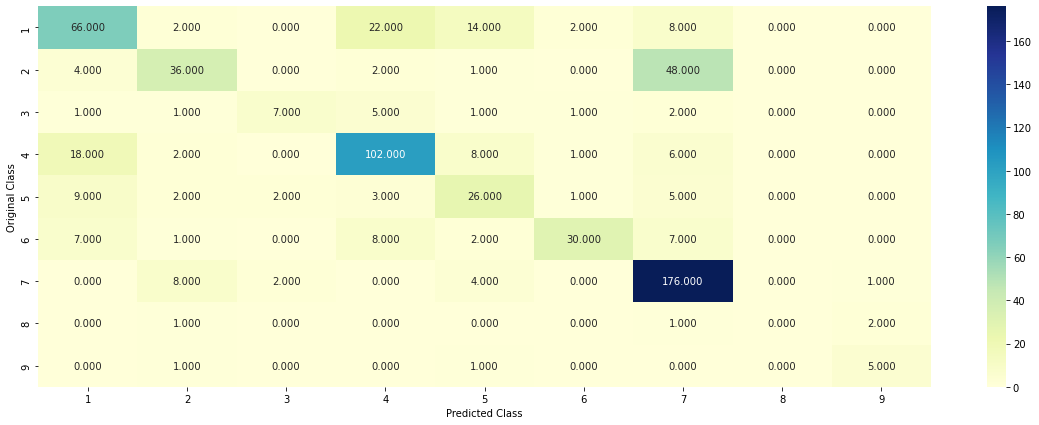

-------------------- Precision matrix (Columm Sum=1) --------------------


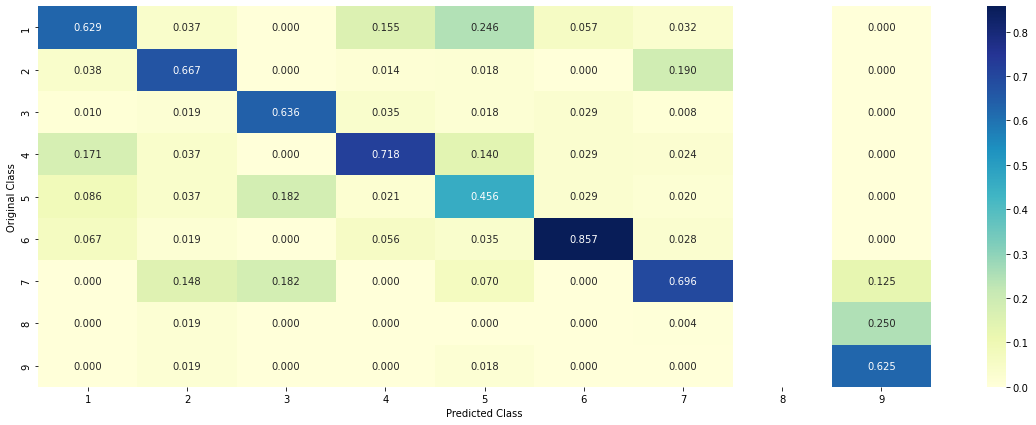

-------------------- Recall matrix (Row sum=1) --------------------


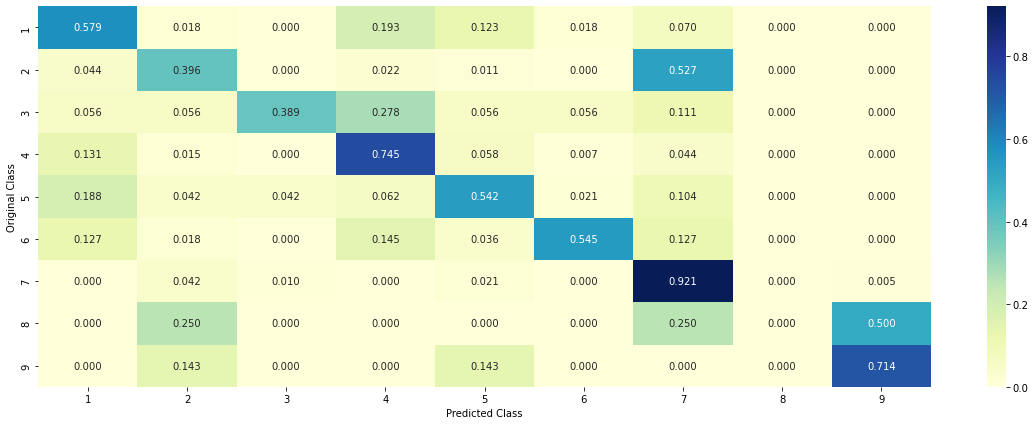

In [255]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
voting_logloss = log_loss(test_y, vclf.predict_proba(test_x_onehotCoding))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

In [258]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameter", "Logloss"]

x.add_row(["OnehotEncoding", "MultinomialNaiveBayes", nb_best_hyperparameter , nb_logloss])
x.add_row(["ResponseCoding", "KNeighborsClassifier", knn_best_hyperparameter, knn_logloss])
x.add_row(["OnehotEncoding", "LogisticRegression_with_balancing", lr_best_hyperparameter_balancing, lr_logloss_balancing])
x.add_row(["OnehotEncoding", "LogisticRegression_without_balancing", lr_best_hyperparameter_without_balancing, lr_logloss_without_balancing])
x.add_row(["OnehotEncoding", "LinearSVM", svm_hyperparameter, svm_logloss])
x.add_row(["OnehotEncoding", "RandomForestClassifier", rf_best_hyperparameter['max_depth'], rf_logloss])
x.add_row(["ResponseCoding", "RandomForestClassifier", rf_best_hyperparameter_responsecoding['max_depth'], rf_logloss_response])
x.add_row(["OnehotEncoding", "StackingClassifier(logistic_reg, MultinomialNB, SVM)", stacking_best_hyperparameter, stacking_logloss])
x.add_row(["OnehotEncoding", "VotingClassifier(logistic_reg, RFClassifier, SVM)", "-" , voting_logloss])
StackingClassifier
print(x)

+----------------+------------------------------------------------------+----------------+--------------------+
|   Vectorizer   |                        Model                         | Hyperparameter |      Logloss       |
+----------------+------------------------------------------------------+----------------+--------------------+
| OnehotEncoding |                MultinomialNaiveBayes                 |       1        | 1.2488488749675963 |
| ResponseCoding |                 KNeighborsClassifier                 |      221       | 1.1648234878512604 |
| OnehotEncoding |          LogisticRegression_with_balancing           |     0.001      | 1.0528341100130267 |
| OnehotEncoding |         LogisticRegression_without_balancing         |     0.001      | 1.0528341100130267 |
| OnehotEncoding |                      LinearSVM                       |      0.01      | 1.1169368960094084 |
| OnehotEncoding |                RandomForestClassifier                |       10       | 1.17109418558